# Conver Trips to Activities

#### ASSUMPTIONS ####
1. Each person starts to travel from home, and return to home at the end of the day.
2. For each trip: 

    1. Current activity is the original (purpose) activity, along with its end time (trip start-time) and (original) location
    2. Next activity is the destination (purpose activity, along with its start time (trip arrival time), end time (departure time), and location
3. Not consider Drop off - Pickup as an activity

### Get data and explore

In [42]:
import numpy as np
import pandas as pd
import zipfile
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [43]:
z = zipfile.ZipFile("../data/vista-12-18.zip")
trips = pd.read_csv(z.open("T_VISTA1218_V1.csv"), low_memory=False)

In [44]:
trips.shape, trips.HHID.nunique(), trips.PERSID.nunique()

((174270, 59), 21941, 49453)

In [45]:
trips.head()

,TRIPID,PERSID,HHID,STOPS,TRIPNO,STARTHOUR,STARTIME,ARRHOUR,ARRTIME,CUMDIST,DEPHOUR,DEPTIME,DURATION,TRAVTIME,TRIPTIME,WAITIME,ORIGLGA,ORIGPLACE1,ORIGPLACE2,ORIGPURP1,ORIGPURP2,DESTLGA,DESTPLACE1,DESTPLACE2,DESTPURP1,DESTPURP2,TRIPPURP,LINKMODE,MODE1,MODE2,MODE3,MODE4,MODE5,MODE6,MODE7,MODE8,MODE9,DIST_GRP,DIST1,DIST2,DIST3,DIST4,DIST5,DIST6,DIST7,DIST8,DIST9,Time_Grp,TIME1,TIME2,TIME3,TIME4,TIME5,TIME6,TIME7,TIME8,TIME9,WDTRIPWGT,WETRIPWGT
0,Y12H0000101P01T01,Y12H0000101P01,Y12H0000101,1,1,8,525,9,545,7.45,17,1050.0,505.0,20,20,0,Whittlesea (C),Accommodation,Survey Home,At Home,At or Go Home,Whittlesea (C),Workplace,My Workplace,Work Related,Own Workplace,Work Related,Vehicle Driver,Vehicle Driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7 - 7.9,7.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 - 24,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.79,NaN
1,Y12H0000101P01T02,Y12H0000101P01,Y12H0000101,1,2,17,1050,17,1075,7.45,NaN,NaN,NaN,25,25,0,Whittlesea (C),Workplace,My Workplace,Work Related,Own Workplace,Whittlesea (C),Accommodation,Survey Home,Go Home,At or Go Home,Work Related,Vehicle Driver,Vehicle Driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7 - 7.9,7.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25 - 29,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.79,NaN
2,Y12H0000101P02T01,Y12H0000101P02,Y12H0000101,1,1,8,500,8,520,3.92,9,540.0,20.0,20,20,0,Whittlesea (C),Accommodation,Survey Home,At Home,At or Go Home,Whittlesea (C),Place of Education,Primary School,Pick-up or Drop-off Someone,Someone picked-up or delivered,Pick-up or Drop-off Someone,Vehicle Driver,Vehicle Driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 - 3.9,3.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 - 24,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.98,NaN
3,Y12H0000101P02T02,Y12H0000101P02,Y12H0000101,1,2,9,540,9,550,2.50,10,600.0,50.0,10,10,0,Whittlesea (C),Place of Education,Primary School,Pick-up or Drop-off Someone,Someone picked-up or delivered,Whittlesea (C),Shops,Shopping Centre,Buy Something,Bought something,Buy Something,Vehicle Driver,Vehicle Driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 - 2.9,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10. - 14.,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.98,NaN
4,Y12H0000101P02T03,Y12H0000101P02,Y12H0000101,1,3,10,600,10,610,2.55,14,890.0,280.0,10,10,0,Whittlesea (C),Shops,Shopping Centre,Buy Something,Bought something,Whittlesea (C),Accommodation,Survey Home,Go Home,At or Go Home,Buy Something,Vehicle Driver,Vehicle Driver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 - 2.9,2.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10. - 14.,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.98,NaN


In [46]:
trips[trips.CUMDIST < 0].shape

(2, 59)

In [47]:
## SELECT RELATED COLUMNS
tripid_cols = ['TRIPID','PERSID','HHID','TRIPNO']
time_cols = ['STARTIME','ARRTIME','DEPTIME','DURATION','TRAVTIME','TRIPTIME','WAITIME']
distance_cols = ['CUMDIST', 'DIST_GRP']
origin_cols = ['ORIGLGA','ORIGPLACE1','ORIGPLACE2','ORIGPURP1','ORIGPURP2']
destin_cols = ['DESTLGA','DESTPLACE1','DESTPLACE2','DESTPURP1','DESTPURP2','TRIPPURP']
general_cols = ['STOPS','LINKMODE','MODE1', 'DIST1', 'WDTRIPWGT']
selected_cols = tripid_cols + time_cols + distance_cols + origin_cols + destin_cols + general_cols
len(selected_cols)

29

In [48]:
trips = trips[selected_cols]

In [49]:
trips.shape

(174270, 29)

In [50]:
trips[origin_cols].head()

,ORIGLGA,ORIGPLACE1,ORIGPLACE2,ORIGPURP1,ORIGPURP2
0,Whittlesea (C),Accommodation,Survey Home,At Home,At or Go Home
1,Whittlesea (C),Workplace,My Workplace,Work Related,Own Workplace
2,Whittlesea (C),Accommodation,Survey Home,At Home,At or Go Home
3,Whittlesea (C),Place of Education,Primary School,Pick-up or Drop-off Someone,Someone picked-up or delivered
4,Whittlesea (C),Shops,Shopping Centre,Buy Something,Bought something


In [51]:
trips[destin_cols].head()

,DESTLGA,DESTPLACE1,DESTPLACE2,DESTPURP1,DESTPURP2,TRIPPURP
0,Whittlesea (C),Workplace,My Workplace,Work Related,Own Workplace,Work Related
1,Whittlesea (C),Accommodation,Survey Home,Go Home,At or Go Home,Work Related
2,Whittlesea (C),Place of Education,Primary School,Pick-up or Drop-off Someone,Someone picked-up or delivered,Pick-up or Drop-off Someone
3,Whittlesea (C),Shops,Shopping Centre,Buy Something,Bought something,Buy Something
4,Whittlesea (C),Accommodation,Survey Home,Go Home,At or Go Home,Buy Something


In [52]:
trips.sort_values(by=['HHID','PERSID','TRIPNO'],inplace=True)

In [53]:
trips.DIST1.describe()

count    174269.000000
mean          9.268502
std          65.537120
min          -0.030000
25%           1.250000
50%           3.400000
75%           9.360000
max        9924.030000
Name: DIST1, dtype: float64

DESTPURP1
Accompany Someone               AxesSubplot(0.125,0.125;0.775x0.755)
Buy Something                   AxesSubplot(0.125,0.125;0.775x0.755)
Change Mode                     AxesSubplot(0.125,0.125;0.775x0.755)
Education                       AxesSubplot(0.125,0.125;0.775x0.755)
Go Home                         AxesSubplot(0.125,0.125;0.775x0.755)
Not Stated                      AxesSubplot(0.125,0.125;0.775x0.755)
Other Purpose                   AxesSubplot(0.125,0.125;0.775x0.755)
Personal Business               AxesSubplot(0.125,0.125;0.775x0.755)
Pick-up or Deliver Something    AxesSubplot(0.125,0.125;0.775x0.755)
Pick-up or Drop-off Someone     AxesSubplot(0.125,0.125;0.775x0.755)
Recreational                    AxesSubplot(0.125,0.125;0.775x0.755)
Social                          AxesSubplot(0.125,0.125;0.775x0.755)
Work Related                    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DIST1, dtype: object

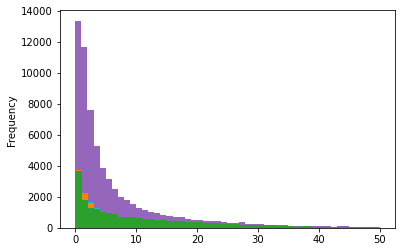

In [54]:
trips[trips.DIST1<50].groupby('DESTPURP1').DIST1.plot(kind='hist',bins=50)

In [55]:
trips.columns

Index(['TRIPID', 'PERSID', 'HHID', 'TRIPNO', 'STARTIME', 'ARRTIME', 'DEPTIME', 'DURATION', 'TRAVTIME', 'TRIPTIME', 'WAITIME', 'CUMDIST', 'DIST_GRP', 'ORIGLGA', 'ORIGPLACE1', 'ORIGPLACE2', 'ORIGPURP1', 'ORIGPURP2', 'DESTLGA', 'DESTPLACE1', 'DESTPLACE2', 'DESTPURP1', 'DESTPURP2', 'TRIPPURP', 'STOPS', 'LINKMODE', 'MODE1', 'DIST1', 'WDTRIPWGT'], dtype='object')

### Get persons have first trip start from home, and last trip back home

In [56]:
trips.TRIPNO.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [57]:
# Check if all first trip start from HOME?
trips.loc[trips.TRIPNO == 1,['ORIGPURP1']].value_counts()

ORIGPURP1                        
At Home                              47459
Unknown Purpose (at start of day)     1763
Work Related                            76
Accompany Someone                       48
Social                                  10
Change Mode                              4
Personal Business                        3
Recreational                             3
Buy Something                            1
dtype: int64

In [58]:
trips.loc[trips.TRIPNO == 1 & trips['ORIGPURP1'].isin(['Unknown Purpose (at start of day)']),:].DESTPURP1.value_counts()

Go Home                         686
Social                          317
Buy Something                   214
Recreational                    165
Work Related                    142
Personal Business                75
Education                        59
Pick-up or Drop-off Someone      38
Accompany Someone                36
Pick-up or Deliver Something     14
Other Purpose                    12
Change Mode                       5
Name: DESTPURP1, dtype: int64

###### First at home activity (At Home Begin Day)

In [59]:
# Only get persons who start FROM HOME (fh_persons)
fh_persons = trips.loc[trips.TRIPNO == 1 & trips['ORIGPURP1'].isin(['At Home']),['HHID','PERSID']]
trips = trips[trips.PERSID.isin(fh_persons.PERSID)]
trips.shape, fh_persons.shape

((168122, 29), (47459, 2))

In [60]:
# Call first at home activity is Home Begin
trips.loc[trips.TRIPNO == 1 & trips['ORIGPURP1'].isin(['At Home']),['ORIGPURP1']] = 'HmB'

###### Last at home activity (At Home End Day)

In [61]:
# Check the last trip's purpose of each person
last_trips = trips.groupby('PERSID',as_index=False).last()
last_trips.shape

(47459, 29)

In [62]:
last_trips.TRIPID.nunique(), last_trips.PERSID.nunique()

(47459, 47459)

In [63]:
# Purpose of last trip
last_trips.DESTPURP1.value_counts()

Go Home                         46316
Personal Business                 804
Social                            102
Change Mode                        97
Accompany Someone                  95
Work Related                       33
Education                           5
Recreational                        5
Pick-up or Deliver Something        1
Other Purpose                       1
Name: DESTPURP1, dtype: int64

In [64]:
gh_persons = last_trips[last_trips.DESTPURP1.isin(['Go Home'])]
gh_persons.shape, last_trips.shape

((46316, 29), (47459, 29))

In [65]:
# Only get persons who in the end GO HOME (gh_persons)
trips = trips[trips.PERSID.isin(gh_persons.PERSID)]
trips.shape, gh_persons.shape

((164719, 29), (46316, 29))

In [66]:
# Call last at home activity is Home End
trips.loc[trips.TRIPID.isin(last_trips.TRIPID),['DESTPURP1']] = 'HmE'

##### Deal with too many trips in a day

In [67]:
# Check number of trips
trips.TRIPNO.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [68]:
# Check all person that have more than 10 trips a day
trips[trips.TRIPNO > 10].PERSID.nunique(), trips[trips.TRIPNO > 10].HHID.nunique()

(459, 426)

In [69]:
trips[trips.PERSID.isin(trips[trips.TRIPNO > 10].PERSID)].shape, trips.shape

((5565, 29), (164719, 29))

In [70]:
trips[trips.HHID.isin(trips[trips.TRIPNO > 10].HHID)].shape

(9711, 29)

In [71]:
# Remove households that have persons more than 10 trips
# => MAYBE SHOULD NOT DO IT - DANHPT 20201016
# trips = trips[~trips.HHID.isin(trips[trips.TRIPNO > 10].HHID)]

In [72]:
trips.shape

(164719, 29)

### Process Activity type (purpose) and Location

In [73]:
#Get previous acitivity infor
trips['PreActLocation'] = trips['ORIGLGA']
trips['PreActLocationType'] = trips['ORIGPLACE1']
trips['PreActType'] = trips['ORIGPURP1']

In [74]:
#Get current activity location and type
trips['ActLocation'] = trips['DESTLGA']
trips['ActLocationType'] = trips['DESTPLACE1']
trips['ActType'] = trips['DESTPURP1']

In [75]:
act_type_cols = ['ActType','ActLocation','ActLocationType','PreActType','PreActLocation','PreActLocationType']

In [76]:
trips[tripid_cols + destin_cols + act_type_cols].head()

,TRIPID,PERSID,HHID,TRIPNO,DESTLGA,DESTPLACE1,DESTPLACE2,DESTPURP1,DESTPURP2,TRIPPURP,ActType,ActLocation,ActLocationType,PreActType,PreActLocation,PreActLocationType
0,Y12H0000101P01T01,Y12H0000101P01,Y12H0000101,1,Whittlesea (C),Workplace,My Workplace,Work Related,Own Workplace,Work Related,Work Related,Whittlesea (C),Workplace,HmB,Whittlesea (C),Accommodation
1,Y12H0000101P01T02,Y12H0000101P01,Y12H0000101,2,Whittlesea (C),Accommodation,Survey Home,HmE,At or Go Home,Work Related,HmE,Whittlesea (C),Accommodation,Work Related,Whittlesea (C),Workplace
2,Y12H0000101P02T01,Y12H0000101P02,Y12H0000101,1,Whittlesea (C),Place of Education,Primary School,Pick-up or Drop-off Someone,Someone picked-up or delivered,Pick-up or Drop-off Someone,Pick-up or Drop-off Someone,Whittlesea (C),Place of Education,HmB,Whittlesea (C),Accommodation
3,Y12H0000101P02T02,Y12H0000101P02,Y12H0000101,2,Whittlesea (C),Shops,Shopping Centre,Buy Something,Bought something,Buy Something,Buy Something,Whittlesea (C),Shops,Pick-up or Drop-off Someone,Whittlesea (C),Place of Education
4,Y12H0000101P02T03,Y12H0000101P02,Y12H0000101,3,Whittlesea (C),Accommodation,Survey Home,Go Home,At or Go Home,Buy Something,Go Home,Whittlesea (C),Accommodation,Buy Something,Whittlesea (C),Shops


In [77]:
trips['ActType'].value_counts(), trips['PreActType'].value_counts()

(HmE                             46316
 Work Related                    21723
 Go Home                         19639
 Buy Something                   17617
 Social                          16167
 Pick-up or Drop-off Someone     11905
 Recreational                     8393
 Personal Business                7907
 Education                        6643
 Accompany Someone                5666
 Pick-up or Deliver Something     2255
 Other Purpose                     470
 Change Mode                        15
 Not Stated                          3
 Name: ActType, dtype: int64,
 HmB                             46316
 Work Related                    21722
 At Home                         19639
 Buy Something                   17617
 Social                          16166
 Pick-up or Drop-off Someone     11904
 Recreational                     8393
 Personal Business                7907
 Education                        6643
 Accompany Someone                5665
 Pick-up or Deliver Something     

In [78]:
# Map activity type
trips.PreActType = trips.PreActType.map({'At Home':'Home', 'Work Related':'Work','Buy Something':'Shop','Social':'Social',
                   'Pick-up or Drop-off Someone':'PuDo','Pick-up or Deliver Something':'PuDo',
                   'Personal Business':'PerBiz','Recreational':'Recreational','Education':'Study',
                   'Accompany Someone':'Other','Other Purpose':'Other','Change Mode':'Other','Not Stated':'Other',
                    'Unknown Purpose (at start of day)':'Other','HmB':'Home'})
trips.ActType = trips.ActType.map({'Go Home':'Home', 'Work Related':'Work','Buy Something':'Shop','Social':'Social',
                   'Pick-up or Drop-off Someone':'PuDo','Pick-up or Deliver Something':'PuDo',
                   'Personal Business':'Personal Biz','Recreational':'Recreational','Education':'Study','HmE':'Home',
                   'Accompany Someone':'Other','Other Purpose':'Other','Change Mode':'Other','Not Stated':'Other'})

In [80]:
trips['ActType'].value_counts(), trips['PreActType'].value_counts()

(Home            65955
 Work            21723
 Shop            17617
 Social          16167
 PuDo            14160
 Recreational     8393
 Personal Biz     7907
 Study            6643
 Other            6154
 Name: ActType, dtype: int64,
 Home            65955
 Work            21722
 Shop            17617
 Social          16166
 PuDo            14159
 Recreational     8393
 PerBiz           7907
 Study            6643
 Other            6157
 Name: PreActType, dtype: int64)

In [81]:
trips.shape

(164719, 35)

### Process Activity start-time and duration

In [82]:
trips[tripid_cols + act_type_cols + time_cols].head()

,TRIPID,PERSID,HHID,TRIPNO,ActType,ActLocation,ActLocationType,PreActType,PreActLocation,PreActLocationType,STARTIME,ARRTIME,DEPTIME,DURATION,TRAVTIME,TRIPTIME,WAITIME
0,Y12H0000101P01T01,Y12H0000101P01,Y12H0000101,1,Work,Whittlesea (C),Workplace,Home,Whittlesea (C),Accommodation,525,545,1050.0,505.0,20,20,0
1,Y12H0000101P01T02,Y12H0000101P01,Y12H0000101,2,Home,Whittlesea (C),Accommodation,Work,Whittlesea (C),Workplace,1050,1075,NaN,NaN,25,25,0
2,Y12H0000101P02T01,Y12H0000101P02,Y12H0000101,1,PuDo,Whittlesea (C),Place of Education,Home,Whittlesea (C),Accommodation,500,520,540.0,20.0,20,20,0
3,Y12H0000101P02T02,Y12H0000101P02,Y12H0000101,2,Shop,Whittlesea (C),Shops,PuDo,Whittlesea (C),Place of Education,540,550,600.0,50.0,10,10,0
4,Y12H0000101P02T03,Y12H0000101P02,Y12H0000101,3,Home,Whittlesea (C),Accommodation,Shop,Whittlesea (C),Shops,600,610,890.0,280.0,10,10,0


#### Get start and end time of activity

In [83]:
# Get end time of previous activity
trips['PreActEndTime'] = trips['STARTIME'] # End of previous activity is the start time of the trip to current activity

In [84]:
# Start time and end time of current activity
trips['ActStartTime'] = trips['ARRTIME']   # Arrival time at activity
trips['ActEndTime']   = trips['DEPTIME']   # End time of activity

In [85]:
# How many different person have null end time of current activity? => These are Null for "Home End" activity
trips.ActEndTime.isna().sum(), trips[trips.ActEndTime.isna()].PERSID.nunique()

(46082, 46078)

In [86]:
# Get END time of "At Home" next day
def getEndTimeAtHome(personGroup):
    return pd.DataFrame({'PreActEndTime':personGroup, 'EndTimeAtHome':personGroup.min() + 24*60})

In [87]:
%%time
# Address NaN of "End Home" activity
trips['EndTimeAtHome'] = trips.groupby(['PERSID']).PreActEndTime.apply(getEndTimeAtHome)['EndTimeAtHome']

CPU times: user 16.8 s, sys: 114 ms, total: 16.9 s
Wall time: 16.5 s


In [88]:
trips.loc[trips.ActEndTime.isna() & trips.ActType.isin(['HmE']),['ActEndTime']] = trips['EndTimeAtHome']

In [89]:
act_cols = ['PreActType','PreActEndTime','ActType','ActStartTime','ActEndTime','EndTimeAtHome']
trips[tripid_cols + act_cols].head(8)

,TRIPID,PERSID,HHID,TRIPNO,PreActType,PreActEndTime,ActType,ActStartTime,ActEndTime,EndTimeAtHome
0,Y12H0000101P01T01,Y12H0000101P01,Y12H0000101,1,Home,525,Work,545,1050.0,1965
1,Y12H0000101P01T02,Y12H0000101P01,Y12H0000101,2,Work,1050,Home,1075,NaN,1965
2,Y12H0000101P02T01,Y12H0000101P02,Y12H0000101,1,Home,500,PuDo,520,540.0,1940
3,Y12H0000101P02T02,Y12H0000101P02,Y12H0000101,2,PuDo,540,Shop,550,600.0,1940
4,Y12H0000101P02T03,Y12H0000101P02,Y12H0000101,3,Shop,600,Home,610,890.0,1940
5,Y12H0000101P02T04,Y12H0000101P02,Y12H0000101,4,Home,890,PuDo,910,940.0,1940
6,Y12H0000101P02T05,Y12H0000101P02,Y12H0000101,5,PuDo,940,Home,950,NaN,1940
7,Y12H0000101P03T01,Y12H0000101P03,Y12H0000101,1,Home,500,Study,520,940.0,1940


In [90]:
trips[trips.TRIPNO > 10].shape

(975, 39)

In [91]:
# Check Next Activiy Endtime Null  => remove them later
trips[trips.ActEndTime.isna()].ActType.value_counts()

Home            46078
Personal Biz        2
Shop                1
Recreational        1
Name: ActType, dtype: int64

#### Get activity duration

In [92]:
# Get duration of next activity
trips['ActDuration'] = trips['ActEndTime'] - trips['ActStartTime']

In [93]:
trips.groupby(['ActType'])['ActDuration'].describe()

,count,mean,std,min,25%,50%,75%,max
ActType,,,,,,,,
Home,19877.0,129.745434,121.868361,-6.0,35.0,90.0,185.0,865.0
Other,6154.0,100.268443,147.488762,-5.0,15.0,45.0,104.0,855.0
Personal Biz,7905.0,59.630234,81.713175,0.0,5.0,35.0,75.0,770.0
PuDo,14160.0,14.418432,38.748506,0.0,1.0,5.0,15.0,822.0
Recreational,8392.0,69.852717,83.697310,0.0,0.0,55.0,90.0,660.0
Shop,17616.0,43.238136,51.706029,0.0,10.0,25.0,55.0,740.0
Social,16167.0,117.592008,107.271945,0.0,40.0,90.0,165.0,945.0
Study,6643.0,366.372723,131.908262,0.0,370.0,405.0,425.0,915.0
Work,21723.0,358.715601,204.103610,0.0,180.0,420.0,525.0,1075.0


In [94]:
# Check the validability of Activity duration 
trips[trips.ActDuration <= 25].ActType.value_counts(), trips[trips.ActDuration <= 25].shape

(PuDo            12629
 Shop             8953
 Home             3732
 Personal Biz     3419
 Recreational     2992
 Social           2721
 Other            2362
 Work             1336
 Study             202
 Name: ActType, dtype: int64,
 (38346, 40))

In [95]:
trips.ActType.value_counts(), trips.shape

(Home            65955
 Work            21723
 Shop            17617
 Social          16167
 PuDo            14160
 Recreational     8393
 Personal Biz     7907
 Study            6643
 Other            6154
 Name: ActType, dtype: int64,
 (164719, 40))

In [96]:
trips.head()

,TRIPID,PERSID,HHID,TRIPNO,STARTIME,ARRTIME,DEPTIME,DURATION,TRAVTIME,TRIPTIME,WAITIME,CUMDIST,DIST_GRP,ORIGLGA,ORIGPLACE1,ORIGPLACE2,ORIGPURP1,ORIGPURP2,DESTLGA,DESTPLACE1,DESTPLACE2,DESTPURP1,DESTPURP2,TRIPPURP,STOPS,LINKMODE,MODE1,DIST1,WDTRIPWGT,PreActLocation,PreActLocationType,PreActType,ActLocation,ActLocationType,ActType,PreActEndTime,ActStartTime,ActEndTime,EndTimeAtHome,ActDuration
0,Y12H0000101P01T01,Y12H0000101P01,Y12H0000101,1,525,545,1050.0,505.0,20,20,0,7.45,7 - 7.9,Whittlesea (C),Accommodation,Survey Home,HmB,At or Go Home,Whittlesea (C),Workplace,My Workplace,Work Related,Own Workplace,Work Related,1,Vehicle Driver,Vehicle Driver,7.45,97.79,Whittlesea (C),Accommodation,Home,Whittlesea (C),Workplace,Work,525,545,1050.0,1965,505.0
1,Y12H0000101P01T02,Y12H0000101P01,Y12H0000101,2,1050,1075,NaN,NaN,25,25,0,7.45,7 - 7.9,Whittlesea (C),Workplace,My Workplace,Work Related,Own Workplace,Whittlesea (C),Accommodation,Survey Home,HmE,At or Go Home,Work Related,1,Vehicle Driver,Vehicle Driver,7.45,97.79,Whittlesea (C),Workplace,Work,Whittlesea (C),Accommodation,Home,1050,1075,NaN,1965,NaN
2,Y12H0000101P02T01,Y12H0000101P02,Y12H0000101,1,500,520,540.0,20.0,20,20,0,3.92,3 - 3.9,Whittlesea (C),Accommodation,Survey Home,HmB,At or Go Home,Whittlesea (C),Place of Education,Primary School,Pick-up or Drop-off Someone,Someone picked-up or delivered,Pick-up or Drop-off Someone,1,Vehicle Driver,Vehicle Driver,3.92,92.98,Whittlesea (C),Accommodation,Home,Whittlesea (C),Place of Education,PuDo,500,520,540.0,1940,20.0
3,Y12H0000101P02T02,Y12H0000101P02,Y12H0000101,2,540,550,600.0,50.0,10,10,0,2.50,2 - 2.9,Whittlesea (C),Place of Education,Primary School,Pick-up or Drop-off Someone,Someone picked-up or delivered,Whittlesea (C),Shops,Shopping Centre,Buy Something,Bought something,Buy Something,1,Vehicle Driver,Vehicle Driver,2.50,92.98,Whittlesea (C),Place of Education,PuDo,Whittlesea (C),Shops,Shop,540,550,600.0,1940,50.0
4,Y12H0000101P02T03,Y12H0000101P02,Y12H0000101,3,600,610,890.0,280.0,10,10,0,2.55,2 - 2.9,Whittlesea (C),Shops,Shopping Centre,Buy Something,Bought something,Whittlesea (C),Accommodation,Survey Home,Go Home,At or Go Home,Buy Something,1,Vehicle Driver,Vehicle Driver,2.55,92.98,Whittlesea (C),Shops,Shop,Whittlesea (C),Accommodation,Home,600,610,890.0,1940,280.0


In [97]:
act_cols = ['TRIPID','PERSID','HHID','TRIPNO','ActLocation','ActLocationType','ActType',
            'ActStartTime','ActEndTime','ActDuration']
activities = trips[act_cols]
activities.shape

(164719, 10)

In [98]:
activities.ActLocation.value_counts()

Melbourne (C)               10242
Boroondara (C)               8189
Greater Geelong (C)          7951
Whitehorse (C)               7837
Casey (C)                    7753
Monash (C)                   7739
Mornington Peninsula (S)     6961
Kingston (C)                 6334
Wyndham (C)                  5686
Knox (C)                     5575
Manningham (C)               5110
Glen Eira (C)                5075
Frankston (C)                5027
Darebin (C)                  4720
Moreland (C)                 4719
Brimbank (C)                 4682
Maroondah (C)                4678
Whittlesea (C)               4654
Hume (C)                     4636
Banyule (C)                  4603
Stonnington (C)              4594
Greater Dandenong (C)        4374
Yarra Ranges (S)             4265
Moonee Valley (C)            4206
Port Phillip (C)             3806
Yarra (C)                    3690
Bayside (C)                  3603
Hobsons Bay (C)              2914
Maribyrnong (C)              2739
Melton (S)    

In [99]:
# Save activities for further analysis
activities.to_csv("../data/activities.csv", index=False)